In [1]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score, cross_val_predict, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve
import re

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cl65610/west_nile/master/models/model_building_df.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('Unnamed: 0.1', axis = 1, inplace = True)

df.head()

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,day,month,...,PrecipTotal,Sunrise,Sunset,month_weather,day_weather,pca1,pca2,pca3,pca4,xt_labels
0,2007-05-29,2,1,41.954690,-87.800991,9,1,0,179,5,...,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123,7
1,2007-05-29,3,1,41.954690,-87.800991,9,1,0,179,5,...,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123,7
2,2007-05-29,3,6,41.994991,-87.769279,9,1,0,179,5,...,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123,2
3,2007-05-29,2,13,41.974089,-87.824812,8,1,0,179,5,...,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123,1
4,2007-05-29,3,13,41.974089,-87.824812,8,4,0,179,5,...,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123,1


In [3]:
features = ['Species', 'Trap', 'Latitude', 'Longitude', 'AddressAccuracy', 'day_weather', 'PrecipTotal', 
           'pca1', 'pca2', 'pca3', 'pca4', 'xt_labels', 'year']
X = df[features]

y = df.WnvPresent

In [4]:
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state = 42)
svm = SVC(probability = True, random_state = 42)
rf = RandomForestClassifier(random_state = 42)
etc = ExtraTreesClassifier(random_state = 42)
gbc = GradientBoostingClassifier(random_state = 42)

In [5]:
voter = VotingClassifier(estimators = [('knn', knn),
                                       ('lr', lr),
                                       ('extra trees', etc),
                                       ('random forest', rf),
                                       ('svm', svm),
                                       ('gbc', gbc)
                                      ],
                        voting = 'soft', weights = [1, 1, 3, 1, 1, 2])


In [6]:
def build_roc(estimator):
    plt.figure(figsize=(12, 10))
    plt.rcParams.update({'font.size': 16})
    estimator_fit = estimator.fit(X, y)
    predicts = estimator.predict_proba(X)
    pred_proba = predicts[:,1]
    
    fpr, tpr, _ = metrics.roc_curve(y, pred_proba)
    
    auc = metrics.auc(fpr, tpr)
    
    text = str(estimator)
    
    m = re.search('[A-Z]+\w+', text)
    if m:
        found = m.group(0)
    
    plt.plot(fpr, tpr, label = found)
    plt.xlim([-.05, 1.0])
    plt.ylim([-.05, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc = 'lower right')
    
    plt.title(found + ('\nAUC: %f' % auc))
    plt.show()

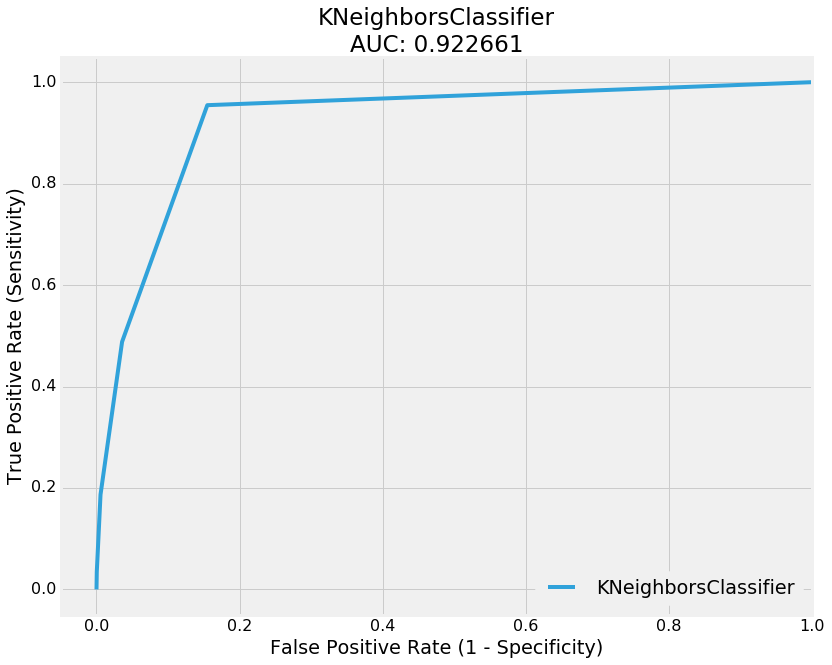

In [7]:
build_roc(knn)

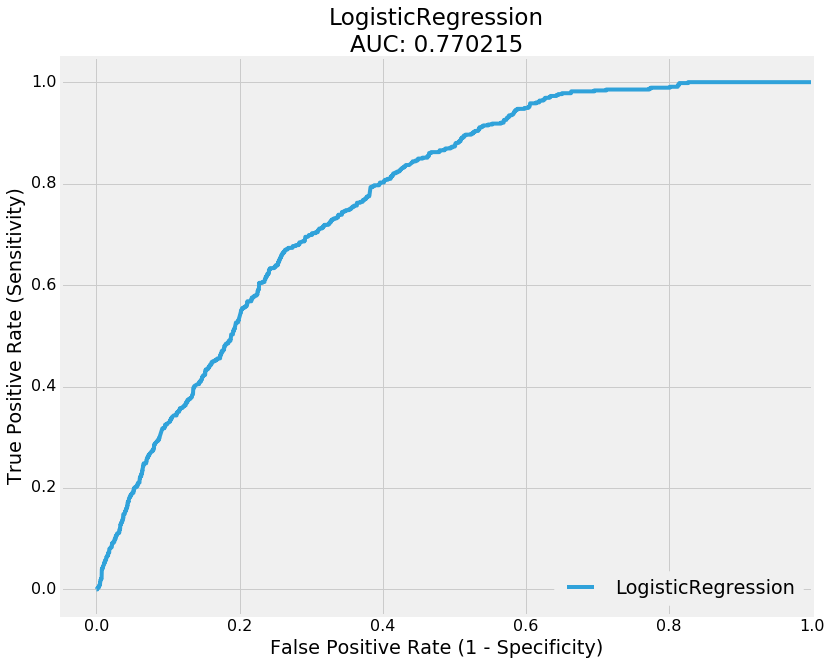

In [8]:
build_roc(lr)

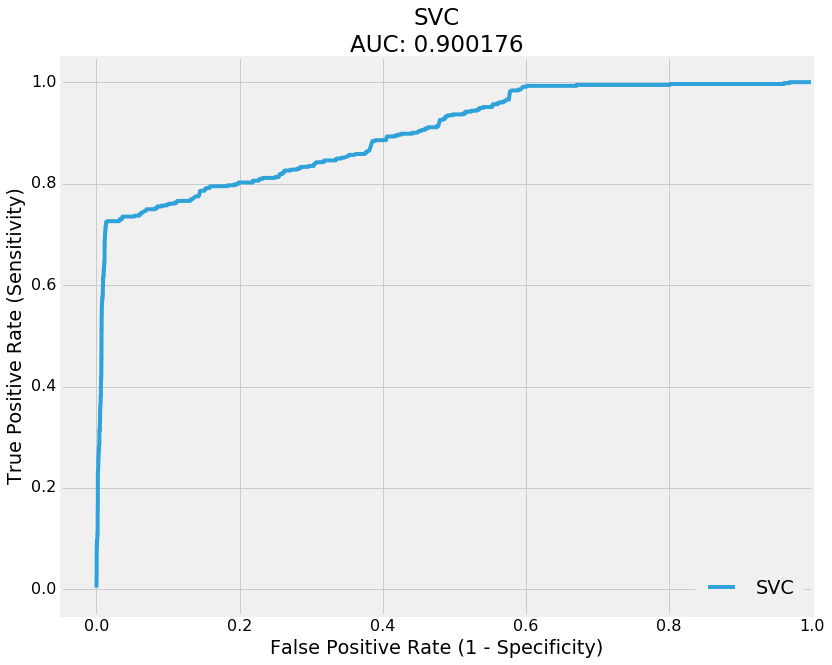

In [9]:
build_roc(svm)

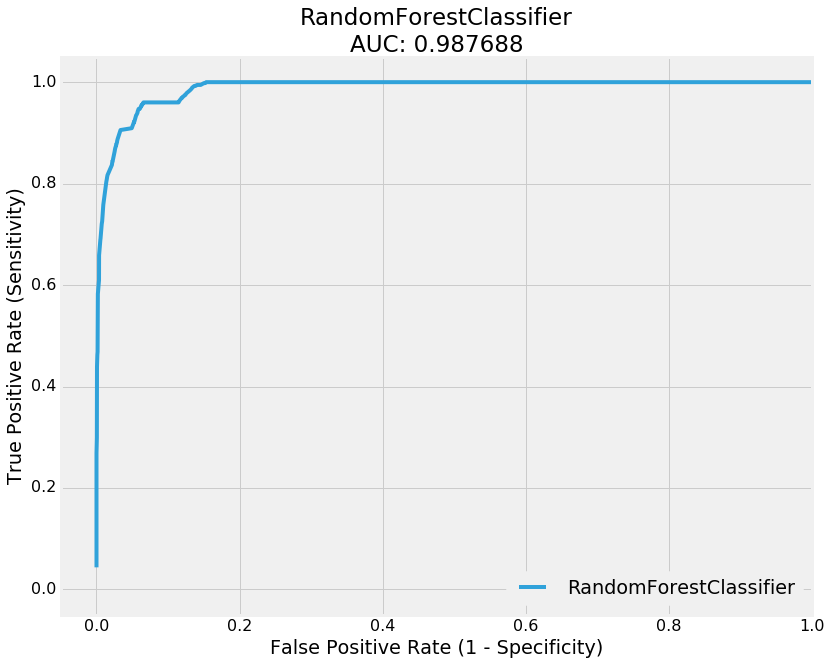

In [10]:
build_roc(rf)

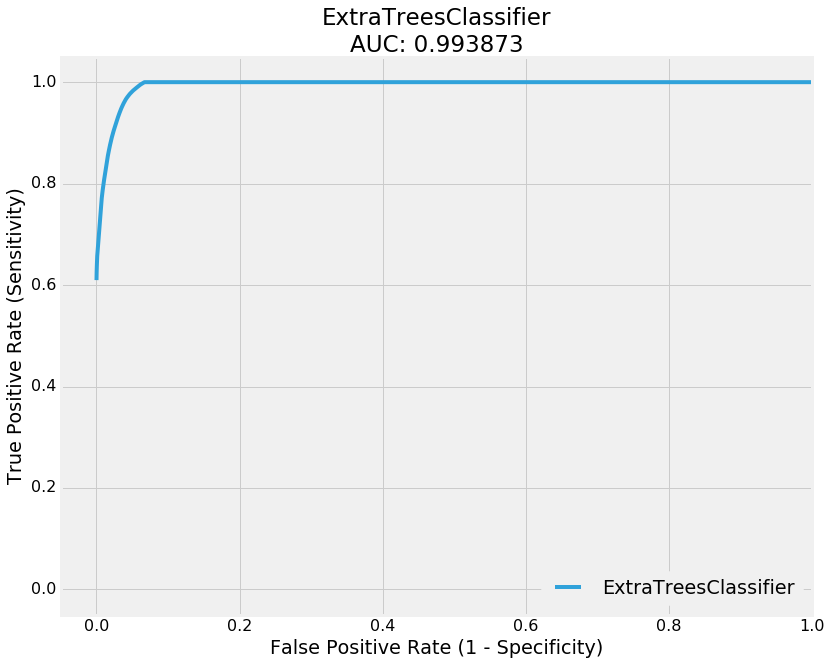

In [11]:
build_roc(etc)

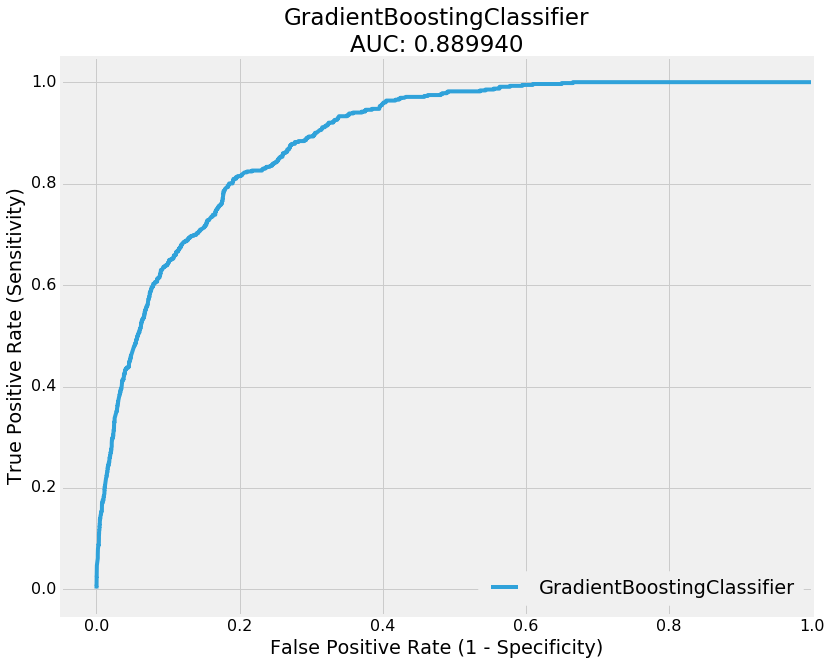

In [12]:
build_roc(gbc)

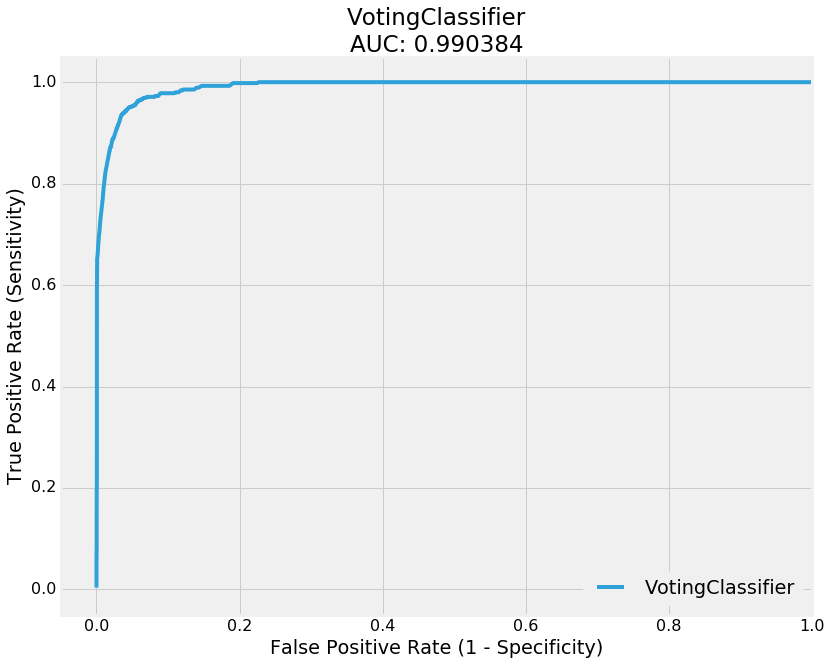

In [13]:
build_roc(voter)

In [14]:
est_list = [knn, lr, svm, rf, etc, gbc, voter]

In [15]:
def build_all_roc(estimator_list):
    
    plt.rcParams.update({'font.size': 16})
    for i in estimator_list:
        plt.figure(figsize=(12, 10))
        estimator_fit = i.fit(X, y)
        predicts = i.predict_proba(X)
        pred_proba = predicts[:,1]

        fpr, tpr, _ = metrics.roc_curve(y, pred_proba)

        auc = metrics.auc(fpr, tpr)
        
        text = str(i)

        m = re.search('[A-Z]+\w+', text)
        if m:
            found = m.group(0)

        plt.plot(fpr, tpr, label = found)
        plt.xlim([-.05, 1.0])
        plt.ylim([-.05, 1.05])
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')

        plt.title(found + ('\nAUC: %f' % auc))
        plt.show()

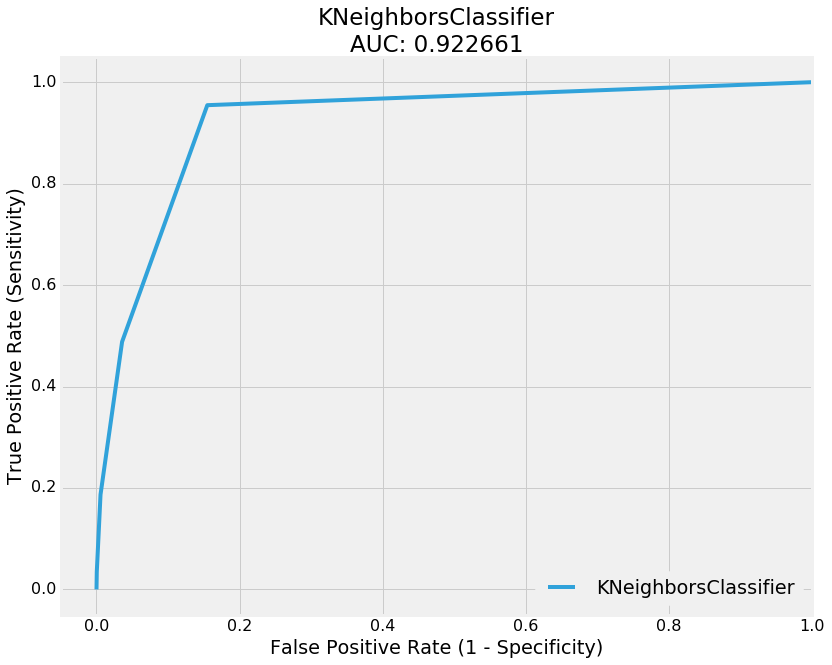

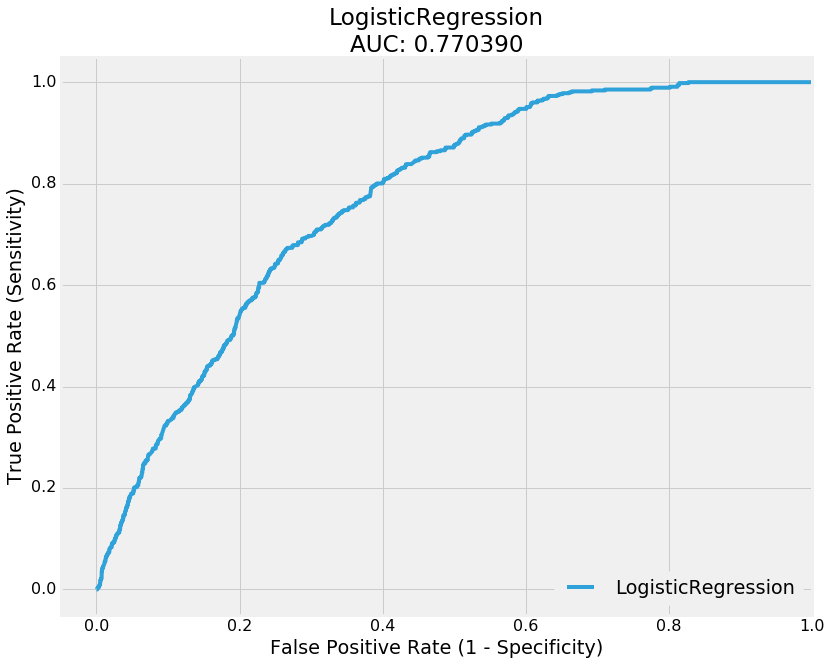

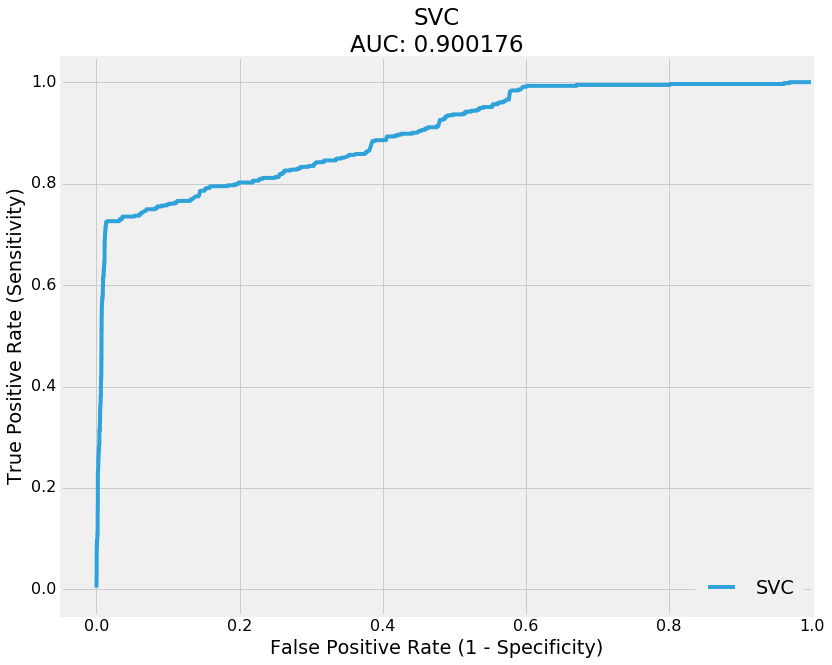

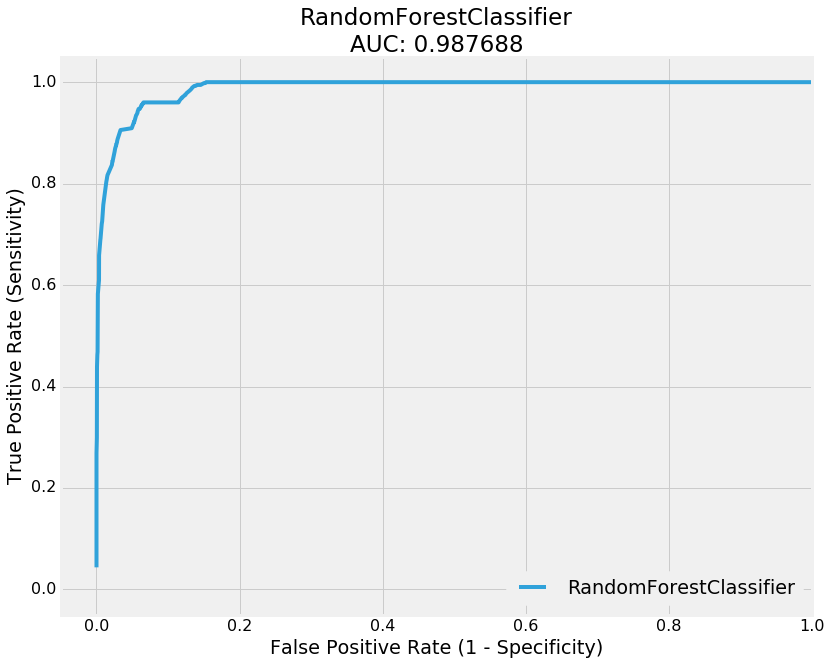

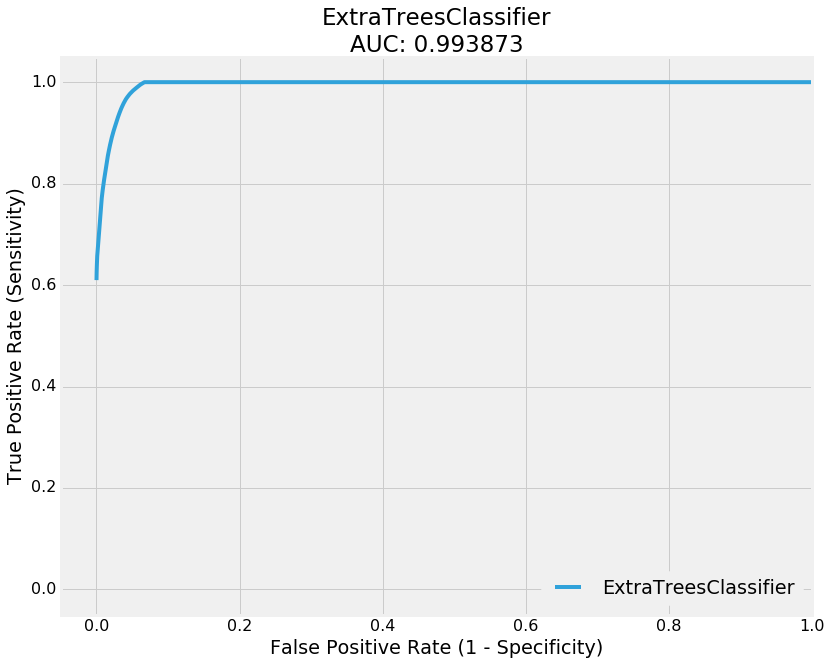

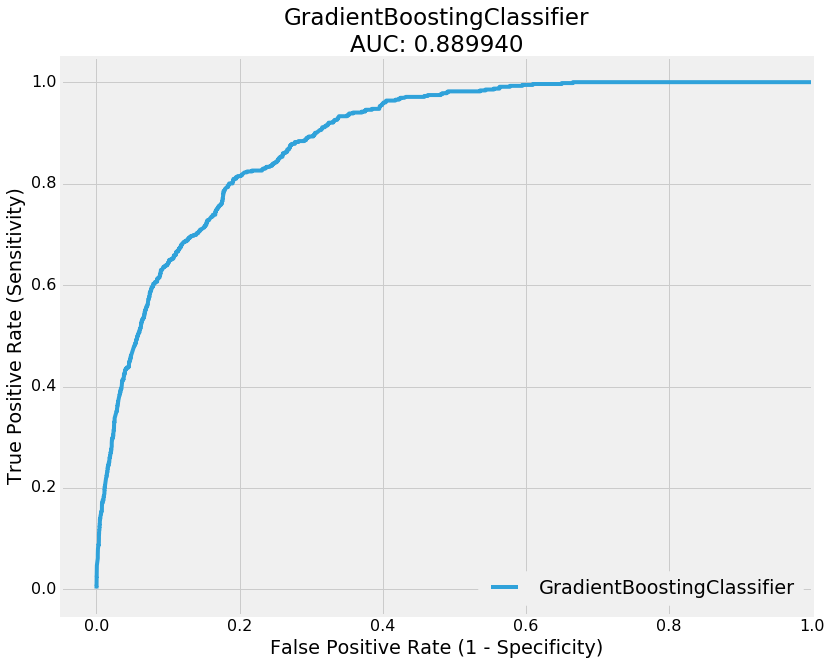

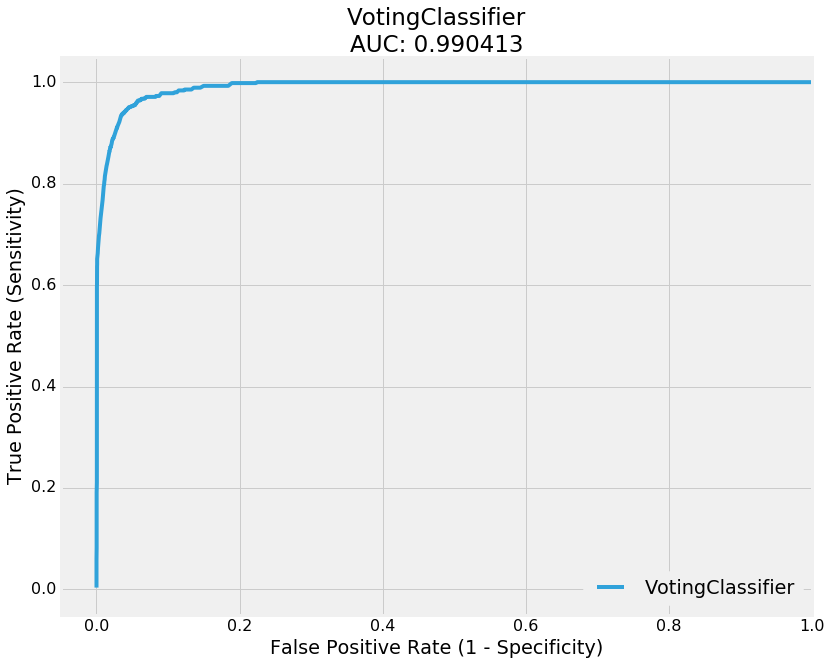

In [16]:
build_all_roc(est_list)

In [17]:
def compile_roc(estimator_list):
    plt.figure(figsize=(18, 15))
    plt.rcParams.update({'font.size': 19})
    for i in estimator_list:
        estimator_fit = i.fit(X, y)
        predicts = i.predict_proba(X)
        pred_proba = predicts[:,1]

        fpr, tpr, _ = metrics.roc_curve(y, pred_proba)

        auc = metrics.auc(fpr, tpr)
        
        text = str(i)

        m = re.search('[A-Z]+\w+', text)
        if m:
            found = m.group(0)
            
        
        
        plt.plot(fpr, tpr, label = found)
        plt.xlim([-.05, 1.0])
        plt.ylim([-.05, 1.05])
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc = 'lower right')
        
        plt.title('ROC Curves')
    plt.show()

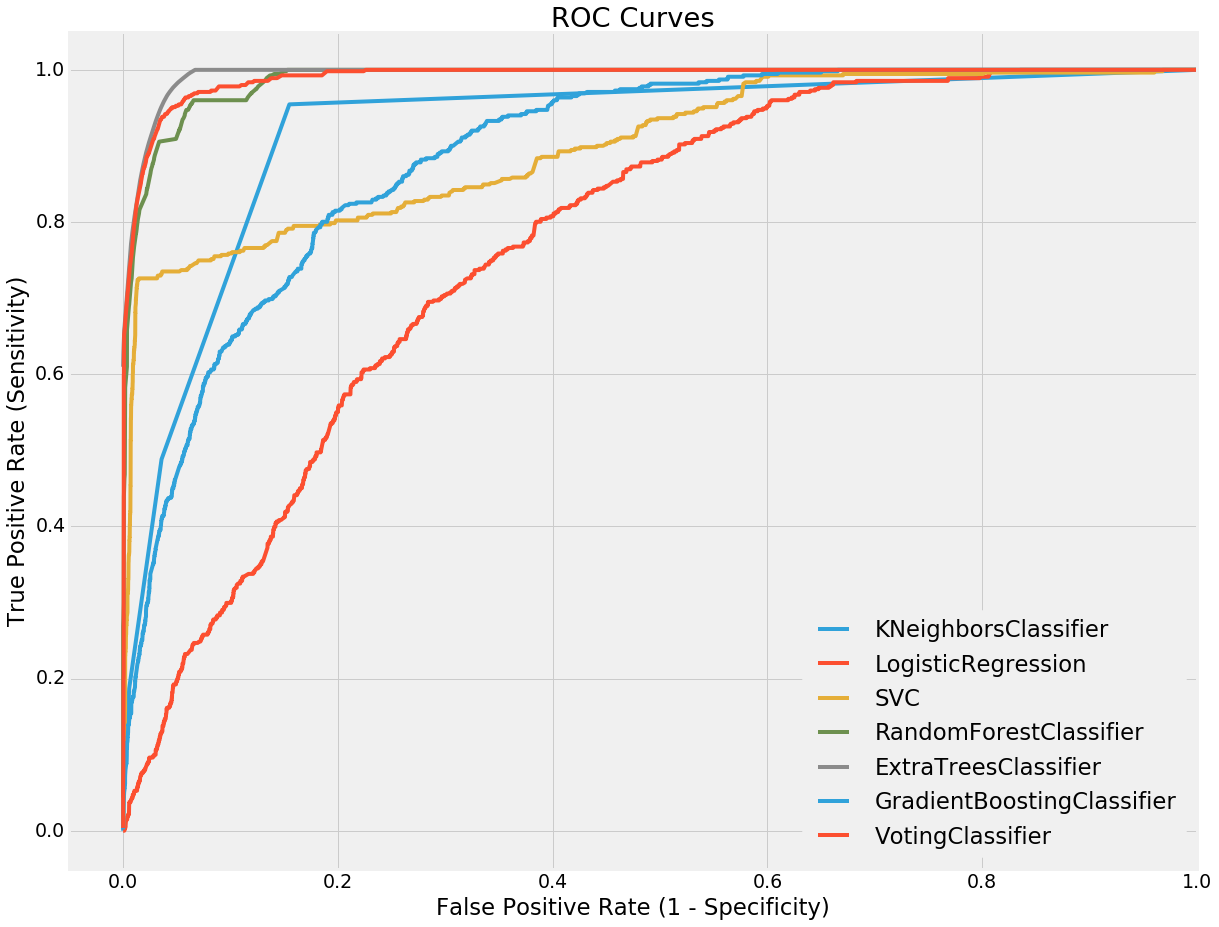

In [18]:
compile_roc(est_list)